<a href="https://colab.research.google.com/github/UsamahPutraFirdaus/Melbourne_Housing_Analysis/blob/main/Melbourne_Housing_Market_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA UNDERSTANDING

### OBJECTIVE
> - To demonstrate practical skills in data preprocessing and descriptive analysis.
>
> ### DATASET:
> - The Melbourne Housing Market dataset, available at [Kaggle - Melbourne Housing](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data).

### BACKGROUND

Melbourne is currently experiencing a housing bubble (some experts say it may burst soon). Maybe you can find a trend to this matter? Which suburbs are the best to buy in? Which ones are value for money? Where's the expensive side of town? And more importantly where should you buy a 2 bedroom unit?

### CONTENT & ACKNOWLEDGEMENTS
This data was scraped from publicly available results posted every week from Domain.com.au, it's cleaned, but you should check it properly to make sure the data analysis is valid.

The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

### DATA DICTIONARY AND KEY DETAILS

- **Suburb:** Suburb
- **Address:** Address
- **Rooms:** Number of rooms
- **Price:** Price in Australian dollars

- **Method:**
**S** - property sold;
**SP** - property sold prior;
**PI** - property passed in;
**PN** - sold prior not disclosed;
**SN** - sold not disclosed;
**NB** - no bid;
**VB** - vendor bid;
**W** - withdrawn prior to auction;
**SA** - sold after auction;
**SS** - sold after auction price not disclosed.
**N/A** - price or highest bid not available.

- **Type:**
**br** - bedroom(s);
**h** - house,cottage,villa, semi,terrace;
**u** - unit, duplex;
**t** - townhouse;
**dev site** - development site;
**o res** - other residential.

- **SellerG:** Real Estate Agent
- **Date:** Date sold
- **Distance:** Distance from CBD in Kilometres
- **Regionname:** General Region (West, North West, North, North east …etc)
- **Propertycount:** Number of properties that exist in the suburb.
- **Bedroom2:** Scraped # of Bedrooms (from different source)
- **Bathroom:** Number of Bathrooms
- **Car:** Number of carspots
- **Landsize:** Land Size in Metres
- **BuildingArea:** Building Size in Metres
- **YearBuilt:** Year the house was built
- **CouncilArea:** Governing council for the area
- **Lattitude:** Self explanitory
- **Longtitude:** Self explanitory

# IMPORTING LIBRARY

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA WRANGLING

## Importing Data

In [101]:
url = "https://docs.google.com/spreadsheets/d/1DLCqSGw7L1cWgADVJ0gm1ZjsjCXd8v7M/edit?usp=drive_link&ouid=109358812002607646858&rtpof=true&sd=true"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
df= pd.read_csv(download_url)

## Assessing Data

### Check Information of the Data

In [102]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [103]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### Check for Missing Data

In [105]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### Check for Data Duplicate

In [106]:
df.duplicated().sum()

0

## Data Cleaning

To convert the data types of the variables YearBuilt and Car from  float64 type to Int64

In [107]:
df['YearBuilt'] = df['YearBuilt'].astype('Int64')
df['Car'] = df['Car'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  Int64  
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   Int64  
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Handling Missing Data

>"It is known that there are 4 columns with missing values (null values), namely Car, BuildingArea, YearBuilt, and Council Area.

>For handling missing values, I am using imputation. For categorical variables such as the Car and CouncilArea columns, we decided to impute using the mode (most frequent value). For numeric variables like BuildingArea and YearBuilt, we are using imputation with the mean and median values."

>Handling missing values in the "Car" column by imputing them using the mode value.

In [108]:
mode_car = df['Car'].mode()[0]
df['Car'].fillna(mode_car, inplace=True)

>Handling missing values in the "BuildingArea" column by imputing them using the mean value.

In [109]:
mean_building_area = df['BuildingArea'].mean()
df['BuildingArea'].fillna(round(mean_building_area), inplace=True)

>Handling missing values in the "YearBuilt" column by imputing them using the median value.

In [110]:
median_year_built = df['YearBuilt'].median()
df['YearBuilt'].fillna(median_year_built, inplace=True)

>Handling missing values in the "CouncilArea" column by imputing them using the mode value.

In [111]:
mode_council_area = df['CouncilArea'].mode()[0]
df['CouncilArea'].fillna(mode_council_area, inplace=True)


>Check the dataset after handling missing data.

In [112]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Text Normalization

In [113]:
print(df['SellerG'].unique())

['Biggin' 'Nelson' 'Jellis' 'Greg' 'LITTLE' 'Collins' 'Kay' 'Beller'
 'Marshall' 'Brad' 'Maddison' 'Barry' 'Considine' 'Rendina' 'Propertyau'
 'McDonald' 'Prof.' 'Harcourts' 'hockingstuart' 'Thomson' 'Buxton' 'RT'
 "Sotheby's" 'Cayzer' 'Chisholm' 'Brace' 'Miles' 'McGrath' 'Love' 'Barlow'
 'Sweeney' 'Village' 'Jas' 'Gunn&Co' 'Burnham' 'Williams' 'Compton' 'FN'
 'Raine&Horne' 'Hunter' 'Noel' 'Hodges' 'Ray' 'Gary' 'Fletchers'
 'Woodards' 'Raine' 'Walshe' 'Alexkarbon' 'Weda' 'Frank' 'Stockdale' 'Tim'
 'Purplebricks' 'Moonee' 'HAR' 'Edward' 'Philip' 'RW' 'North' 'Ascend'
 'Christopher' 'Mandy' 'R&H' 'Fletchers/One' 'Assisi' 'One' "O'Brien"
 'C21' 'Bayside' 'Paul' 'First' 'Matthew' 'Anderson' 'Nick' 'Lindellas'
 'Allens' 'Bells' 'Trimson' 'Douglas' 'YPA' 'GL' "Tiernan's" 'J'
 'Harrington' 'Dingle' 'Chambers' 'Peter' 'Grantham'
 'hockingstuart/Advantage' "O'Donoghues" 'Bekdon' 'Ross' 'Garvey' 'Weast'
 'Century' 'Kelly' 'Property' "Private/Tiernan's" 'Australian' 'Rodney'
 "Abercromby's" 'Cast

>In the above data, inconsistencies in text are observed, requiring text normalization

In [114]:
# Making the text capitalized for each word.
df['SellerG'] = df['SellerG'].str.title()

In [115]:
print(df['SellerG'].unique())

['Biggin' 'Nelson' 'Jellis' 'Greg' 'Little' 'Collins' 'Kay' 'Beller'
 'Marshall' 'Brad' 'Maddison' 'Barry' 'Considine' 'Rendina' 'Propertyau'
 'Mcdonald' 'Prof.' 'Harcourts' 'Hockingstuart' 'Thomson' 'Buxton' 'Rt'
 "Sotheby'S" 'Cayzer' 'Chisholm' 'Brace' 'Miles' 'Mcgrath' 'Love' 'Barlow'
 'Sweeney' 'Village' 'Jas' 'Gunn&Co' 'Burnham' 'Williams' 'Compton' 'Fn'
 'Raine&Horne' 'Hunter' 'Noel' 'Hodges' 'Ray' 'Gary' 'Fletchers'
 'Woodards' 'Raine' 'Walshe' 'Alexkarbon' 'Weda' 'Frank' 'Stockdale' 'Tim'
 'Purplebricks' 'Moonee' 'Har' 'Edward' 'Philip' 'Rw' 'North' 'Ascend'
 'Christopher' 'Mandy' 'R&H' 'Fletchers/One' 'Assisi' 'One' "O'Brien"
 'C21' 'Bayside' 'Paul' 'First' 'Matthew' 'Anderson' 'Nick' 'Lindellas'
 'Allens' 'Bells' 'Trimson' 'Douglas' 'Ypa' 'Gl' "Tiernan'S" 'J'
 'Harrington' 'Dingle' 'Chambers' 'Peter' 'Grantham'
 'Hockingstuart/Advantage' "O'Donoghues" 'Bekdon' 'Ross' 'Garvey' 'Weast'
 'Century' 'Kelly' 'Property' "Private/Tiernan'S" 'Australian' 'Rodney'
 "Abercromby'S" 'Cast

>In the above data, there is a unique symbol (@) that needs to be removed.

In [116]:
df['SellerG'] = df['SellerG'].str.replace("@", "")
print(df['SellerG'])

0          Biggin
1          Biggin
2          Biggin
3          Biggin
4          Nelson
           ...   
13575       Barry
13576    Williams
13577       Raine
13578     Sweeney
13579     Village
Name: SellerG, Length: 13580, dtype: object


In [117]:
print(df['SellerG'].unique())

['Biggin' 'Nelson' 'Jellis' 'Greg' 'Little' 'Collins' 'Kay' 'Beller'
 'Marshall' 'Brad' 'Maddison' 'Barry' 'Considine' 'Rendina' 'Propertyau'
 'Mcdonald' 'Prof.' 'Harcourts' 'Hockingstuart' 'Thomson' 'Buxton' 'Rt'
 "Sotheby'S" 'Cayzer' 'Chisholm' 'Brace' 'Miles' 'Mcgrath' 'Love' 'Barlow'
 'Sweeney' 'Village' 'Jas' 'Gunn&Co' 'Burnham' 'Williams' 'Compton' 'Fn'
 'Raine&Horne' 'Hunter' 'Noel' 'Hodges' 'Ray' 'Gary' 'Fletchers'
 'Woodards' 'Raine' 'Walshe' 'Alexkarbon' 'Weda' 'Frank' 'Stockdale' 'Tim'
 'Purplebricks' 'Moonee' 'Har' 'Edward' 'Philip' 'Rw' 'North' 'Ascend'
 'Christopher' 'Mandy' 'R&H' 'Fletchers/One' 'Assisi' 'One' "O'Brien"
 'C21' 'Bayside' 'Paul' 'First' 'Matthew' 'Anderson' 'Nick' 'Lindellas'
 'Allens' 'Bells' 'Trimson' 'Douglas' 'Ypa' 'Gl' "Tiernan'S" 'J'
 'Harrington' 'Dingle' 'Chambers' 'Peter' 'Grantham'
 'Hockingstuart/Advantage' "O'Donoghues" 'Bekdon' 'Ross' 'Garvey' 'Weast'
 'Century' 'Kelly' 'Property' "Private/Tiernan'S" 'Australian' 'Rodney'
 "Abercromby'S" 'Cast

## Detecting and Handling Outliers

### Detecting Outliers

Detecting Outliers Using IQR Method

In [118]:
# Identify outliers using IQR
Q1 = df.quantile(0.25, numeric_only = True)
Q3 = df.quantile(0.75, numeric_only = True)
IQR = Q3 - Q1
print(IQR)

Rooms                 1.0
Price            680000.0
Distance              6.9
Postcode            104.0
Bedroom2              1.0
Bathroom              1.0
Car                   1.0
Landsize            474.0
BuildingArea         30.0
YearBuilt            15.0
Lattitude        0.100423
Longtitude       0.128705
Propertycount      5951.0
dtype: Float64


In [119]:
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers

<ipython-input-119-f0a9391e57c7>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
<ipython-input-119-f0a9391e57c7>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


,Address,Bathroom,Bedroom2,BuildingArea,Car,CouncilArea,Date,Distance,Landsize,Lattitude,...,Method,Postcode,Price,Propertycount,Regionname,Rooms,SellerG,Suburb,Type,YearBuilt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13576,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13577,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13578,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [120]:
Q1 = df.quantile(0.25, numeric_only = True)
Q3 = df.quantile(0.75, numeric_only = True)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

df, Q1 = df.align(Q1, axis=1, copy=False)
df, Q3 = df.align(Q3, axis=1, copy=False)

# Identify outliers using IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Report columns with outliers and the number of outliers detected
outliers_count = outliers.sum()
columns_with_outliers = outliers_count[outliers_count > 0]

print("Columns with outliers:")
print(columns_with_outliers)

print("\nNumber of outliers detected:")
print(outliers_count)

Columns with outliers:
Bathroom          143
Bedroom2          655
BuildingArea     2344
Car               644
Distance          411
Landsize          368
Lattitude         262
Longtitude        408
Postcode          208
Price             612
Propertycount     359
Rooms             682
YearBuilt        3975
dtype: int64

Number of outliers detected:
Address             0
Bathroom          143
Bedroom2          655
BuildingArea     2344
Car               644
CouncilArea         0
Date                0
Distance          411
Landsize          368
Lattitude         262
Longtitude        408
Method              0
Postcode          208
Price             612
Propertycount     359
Regionname          0
Rooms             682
SellerG             0
Suburb              0
Type                0
YearBuilt        3975
dtype: int64


### Handling Outliers

>>**Propose a strategy to handle the outliers. Justify your choice of strategy**

>>
**Removal**: You can simply remove the rows containing outliers from the dataset. However, this approach should be used with caution, as it might lead to loss of valuable information, especially if the outliers are not due to errors but represent valid extreme values in the data.
>>
**Justification**: Outliers can arise due to measurement errors or invalid data input. In this context, removing outliers can help mitigate the influence of errors and increase the reliability of the analysis..

In [121]:
# Removal / dropping outliers

df = df[~outliers.any(axis=1)]

print("Updated DataFrame after removing outliers:")
print(df)

Updated DataFrame after removing outliers:
                  Address  Bathroom  Bedroom2  BuildingArea  Car CouncilArea  \
0            85 Turner St       1.0       2.0         152.0    1       Yarra   
3        40 Federation La       2.0       3.0         152.0    1       Yarra   
5          129 Charles St       1.0       2.0         152.0    0       Yarra   
8      6/241 Nicholson St       1.0       1.0         152.0    1       Yarra   
10     411/8 Grosvenor St       2.0       2.0         152.0    1       Yarra   
...                   ...       ...       ...           ...  ...         ...   
13570       34 Fewster Dr       2.0       3.0         152.0    2    Moreland   
13571          15 Mara Cl       2.0       4.0         191.0    2    Moreland   
13574          9 Black St       2.0       3.0         152.0    2    Moreland   
13575        12 Strada Cr       2.0       4.0         152.0    2    Moreland   
13576       77 Merrett Dr       2.0       3.0         133.0    2    Moreland 

Detecting Outliers after Handling Outliers

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


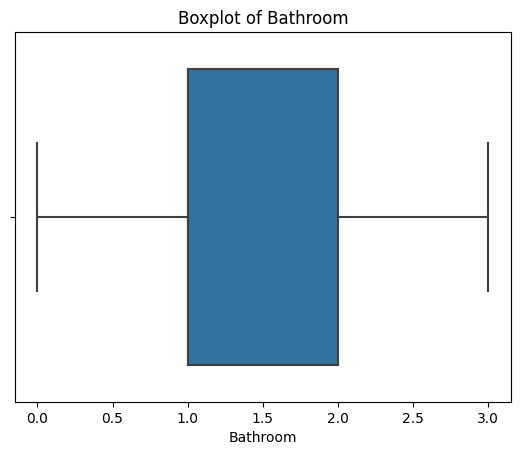

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


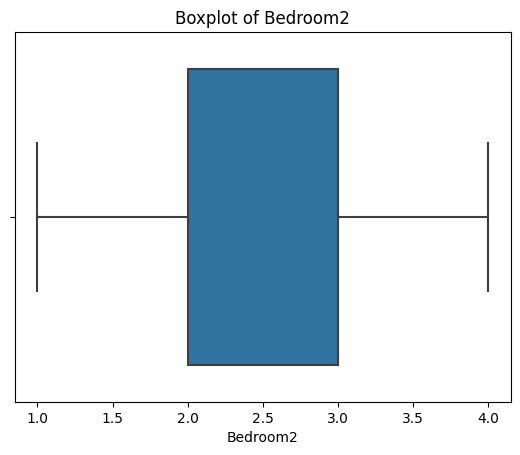

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


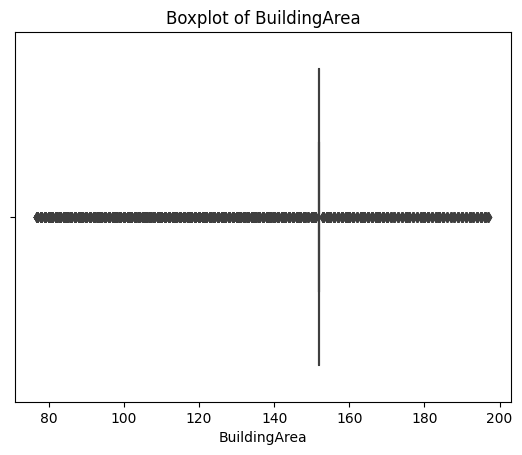

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


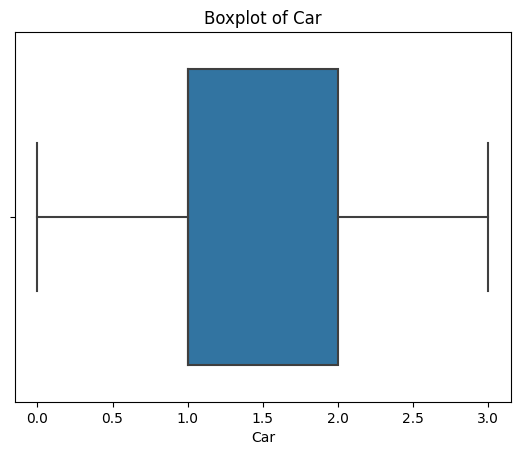

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


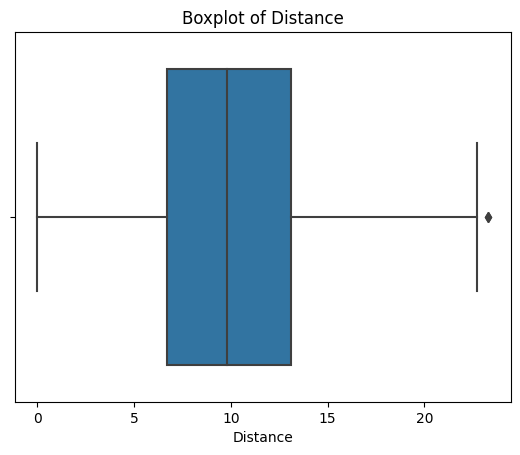

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


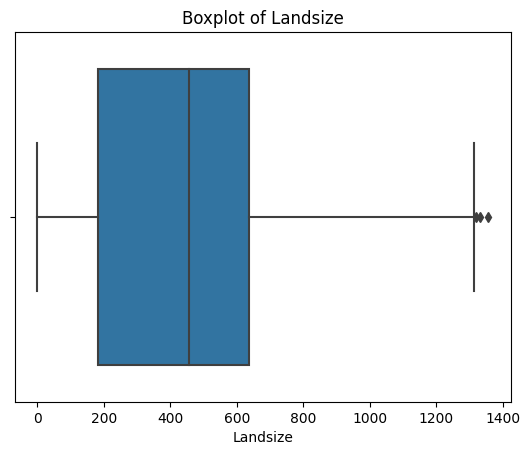

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


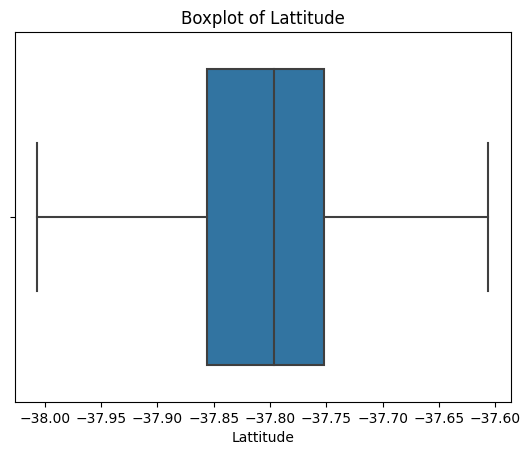

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


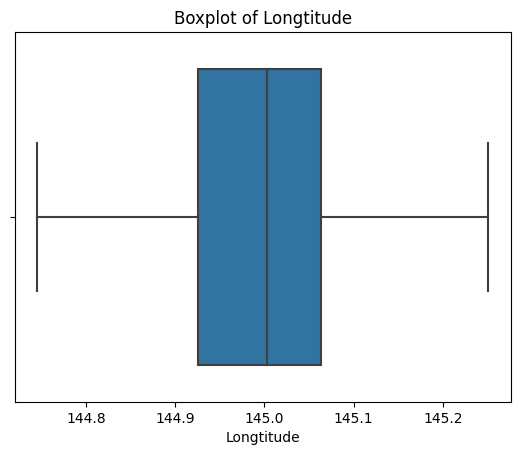

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


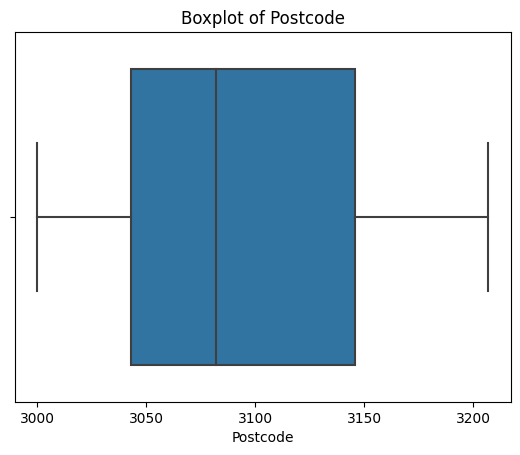

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


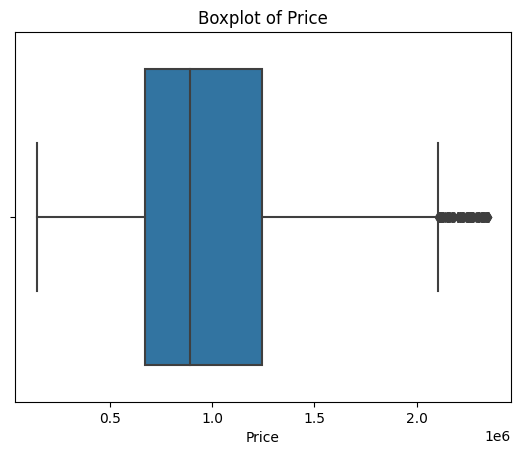

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


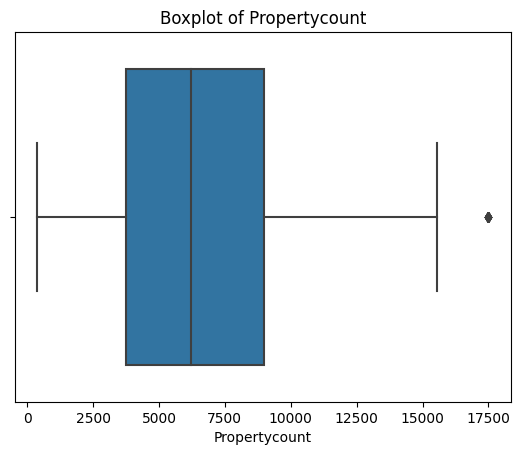

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


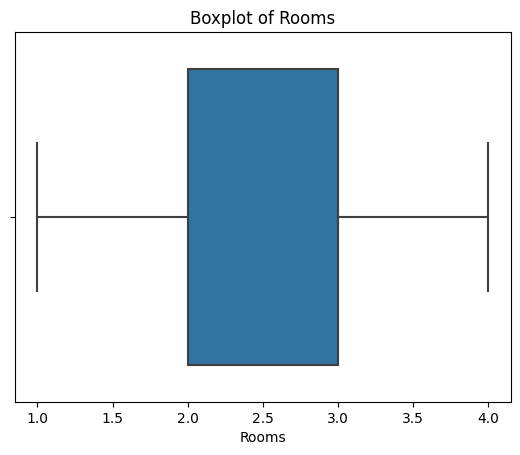

<ipython-input-123-2ac86d942782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)


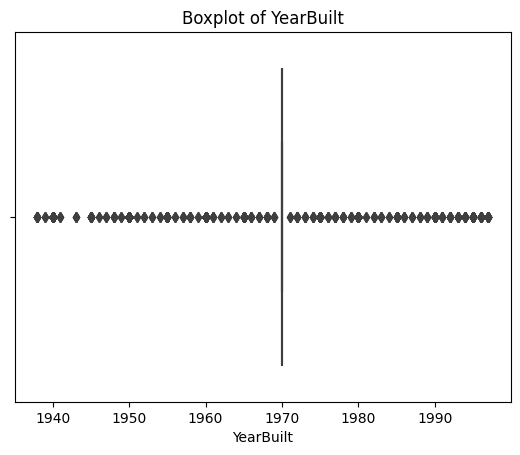

Jumlah Outlier untuk Masing-masing Kolom:
           Column Outlier Count
0        Bathroom             0
1        Bedroom2             0
2    BuildingArea          2008
3             Car             0
4        Distance             2
5        Landsize             3
6       Lattitude             0
7      Longtitude             0
8        Postcode             0
9           Price            90
10  Propertycount            15
11          Rooms             0
12      YearBuilt          2081


In [123]:
outlier_counts = pd.DataFrame(columns=['Column', 'Outlier Count'])

# Making boxplot and count the number of outliers for each numeric column
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    outlier_count = outliers.sum()

    outlier_counts = outlier_counts.append({'Column': column, 'Outlier Count': outlier_count}, ignore_index=True)

    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

print("Jumlah Outlier untuk Masing-masing Kolom:")
print(outlier_counts)